In [41]:
import numpy as np 
import matplotlib.pyplot as plt

In [42]:
# parameters and define the function here here 
beta = 0.9

def utility(x,d):
    if d == 0:
        return -2*x 
    if d == 1:
        return -6 #fixed restocking cost 

def next_state(x,d):
    if d == 0:
        return max(x-1,0)
    if d == 1:
        return 4 #max inventory

In [43]:
V = np.zeros(5) #initialize first guess all equals 0

def iteration(value):
    last_one = value.copy()
    for i in range(5):
        state = i
        v0 = np.exp(utility(state,0) + beta*last_one[next_state(state,0)])
        v1 = np.exp(utility(state,1) + beta*last_one[next_state(state,1)])
        value[i] = np.log(v0+v1)

distance = 1
distance_record = []
first, second, third, fourth, fifth = [],[],[],[],[]
while distance > 0.00001:
    first.append(V[0])
    second.append(V[1])
    third.append(V[2])
    fourth.append(V[3])
    fifth.append(V[4])
    last_one = V.copy()
    iteration(V)
    distance = sum(abs(last_one - V))
    distance_record.append(distance)

print(len(first), len(distance_record))

48 48


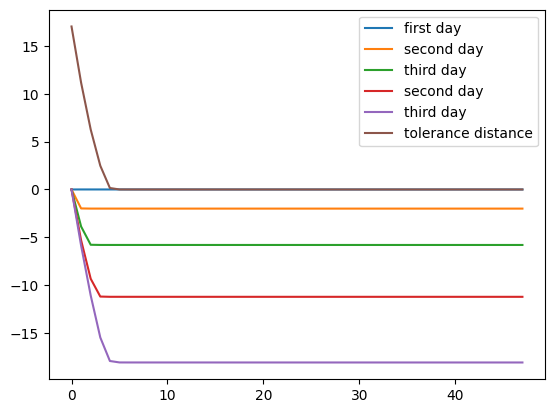

In [47]:
#graphing out the movement of the values to show that it converges 
x = np.arange(len(first))  # Time axis from 0 to 99

plt.plot(x,first, label='first day')
plt.plot(x,second, label='second day')
plt.plot(x,third, label='third day')
plt.plot(x,fourth, label='second day')
plt.plot(x,fifth, label='third day')

plt.plot(x,distance_record, label='tolerance distance')
plt.legend()
plt.show()

#this shows that the value function actually converges 